US government debt in 2016 was $19.8 trillion. That’s $61,875 owed by every man, woman and child in the United States. Is this level of indebtedness acceptable?

US government debt is one of the most important metrics for gauging the health of the economy. To whom the government owes money is of great interest. Indebtedness can signal to investors that the economy is unsuitable. This might trigger a recession.

Owning US debt could potentially give foreign governments or banks leverage over the US government. If the government falters on payments, it could affect its credit rating and its future ability to borrow, and thus its ability to finance itself.

So how problematic is US debt? What will it look like in a few years? And what does a debt of 19 trillion dollars mean when compared to other metrics?

First, compare the amount of US debt with US government income over the last 50 years. The difference between income and debt is the Debt to Income Ratio (DIR). Next, compare the debt with the value of GDP and the Current Account.

GDP, or gross domestic product, is the value of all goods and services produced within a country. Current account (CA) is the value of goods and services traded between a country and its trade partners. A negative CA indicates importing, while a positive CA indicates exporting.

In [1]:
#Imports
import warnings
warnings.simplefilter('ignore',FutureWarning)


#For Data Analysis
from pandas import *
import pandas as pd
import numpy as np
import datetime
from pandas_datareader import data,wb
from pandas import Series,DataFrame

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
sns.set_style('whitegrid')
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize']=(12,9)

Populating the interactive namespace from numpy and matplotlib


/home/nova/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plotting', 'test', 'unique']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
start = datetime.datetime(1966, 1, 1)
end = datetime.datetime(2017, 1, 1)

In [3]:
debt_df = data.DataReader(['GDP','GFDEBTN','NETFI','FGRECPT'],'fred',start,end)

In [4]:
debt_df.columns = ['GDP','US_Debt','US_CA','Gov_Income']

#debt_df.reset_index(level=0, inplace=True)

debt_df.head()

,GDP,US_Debt,US_CA,Gov_Income
DATE,,,,
1966-01-01,797.3,320999,4.7,132.0
1966-04-01,807.2,316097,3.9,136.7
1966-07-01,820.8,324748,2.7,139.1
1966-10-01,834.9,329319,3.9,141.8
1967-01-01,846.0,330947,4.4,142.6


In [5]:
debt_df.tail()

,GDP,US_Debt,US_CA,Gov_Income
DATE,,,,
2016-01-01,18325.2,19264939,-491.5,3400.9
2016-04-01,18538.0,19381591,-431.7,3441.7
2016-07-01,18729.1,19573445,-443.4,3486.3
2016-10-01,18905.5,19976827,-477.0,3479.4
2017-01-01,19057.7,19846420,-487.4,3589.2


In [6]:
def roundtoThousands (value):
    result = round(value/1000)
    return result

In [7]:
#Apply function 

debt_df['US_Debt'] = debt_df['US_Debt'].apply(roundtoThousands)

In [8]:
debt_df.head()

,GDP,US_Debt,US_CA,Gov_Income
DATE,,,,
1966-01-01,797.3,321,4.7,132.0
1966-04-01,807.2,316,3.9,136.7
1966-07-01,820.8,325,2.7,139.1
1966-10-01,834.9,329,3.9,141.8
1967-01-01,846.0,331,4.4,142.6


In [10]:
debt_df['US_DIR'] = debt_df['Gov_Income'] - debt_df['US_Debt']

In [11]:
debt_df.head()

,GDP,US_Debt,US_CA,Gov_Income,US_DIR
DATE,,,,,
1966-01-01,797.3,321,4.7,132.0,-189.0
1966-04-01,807.2,316,3.9,136.7,-179.3
1966-07-01,820.8,325,2.7,139.1,-185.9
1966-10-01,834.9,329,3.9,141.8,-187.2
1967-01-01,846.0,331,4.4,142.6,-188.4


In [13]:
debt_df.tail()

,GDP,US_Debt,US_CA,Gov_Income,US_DIR
DATE,,,,,
2016-01-01,18325.2,19265,-491.5,3400.9,-15864.1
2016-04-01,18538.0,19382,-431.7,3441.7,-15940.3
2016-07-01,18729.1,19573,-443.4,3486.3,-16086.7
2016-10-01,18905.5,19977,-477.0,3479.4,-16497.6
2017-01-01,19057.7,19846,-487.4,3589.2,-16256.8


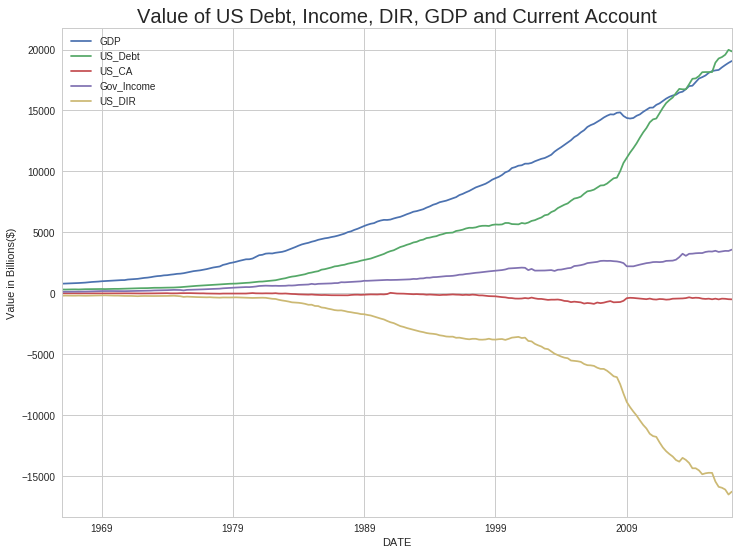

In [12]:
debt_plot = debt_df.plot(grid=True)

debt_plot.set_title('Value of US Debt, Income, DIR, GDP and Current Account',fontsize=20)

debt_plot.set_ylabel('Value in Billions($)')

Both government income and debt have increased steadily over the last 50 years. For this entire period, the US has had a negative Debt to Income Ratio, where the annual amount of debt exceeds the annual amount of income.

GDP value was much higher than debt value for most of that period, however, debt value overtook GDP value in 2013. The current account seems to have little correlation with debt. In  2008, GDP and the current account contracted, while debt more rapidly increased.

Next, how has debt grown over the last 50 years? How does it compare with GDP and DIR growth?

In [14]:
debt_growth = debt_df.apply(lambda x : x / x[0])

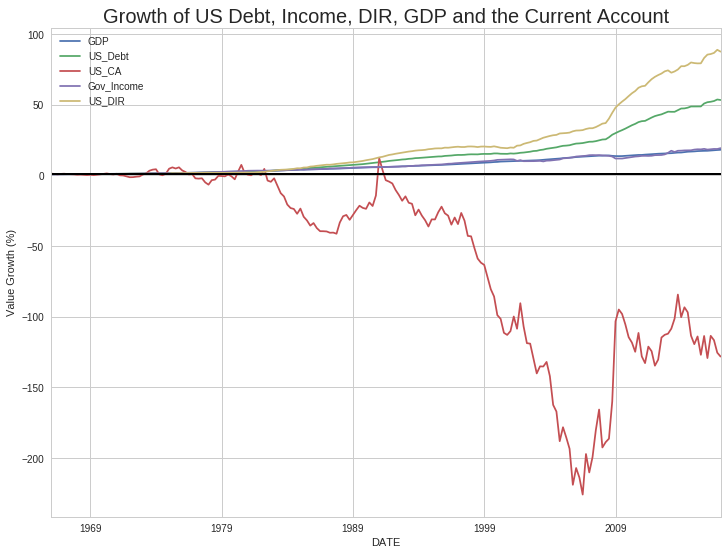

In [15]:
debt_growth_plot = debt_growth.plot(grid=True)

debt_growth_plot.axhline(y = 1, color = 'black', lw = 2)

debt_growth_plot.set_title('Growth of US Debt, Income, DIR, GDP and the Current Account',fontsize=20)

debt_growth_plot.set_ylabel('Value Growth (%)')

In [16]:
#columns = ['Col1', 'Col2', ...]
#df.drop(columns, inplace=True, axis=1)

del_col = ['GDP','US_CA']

debt_df.drop(del_col, inplace=True, axis=1)

In [17]:
debt_df.head()

,US_Debt,Gov_Income,US_DIR
DATE,,,
1966-01-01,321,132.0,-189.0
1966-04-01,316,136.7,-179.3
1966-07-01,325,139.1,-185.9
1966-10-01,329,141.8,-187.2
1967-01-01,331,142.6,-188.4


In [18]:
second_debt_growth = debt_df.apply(lambda x : x / x[0])

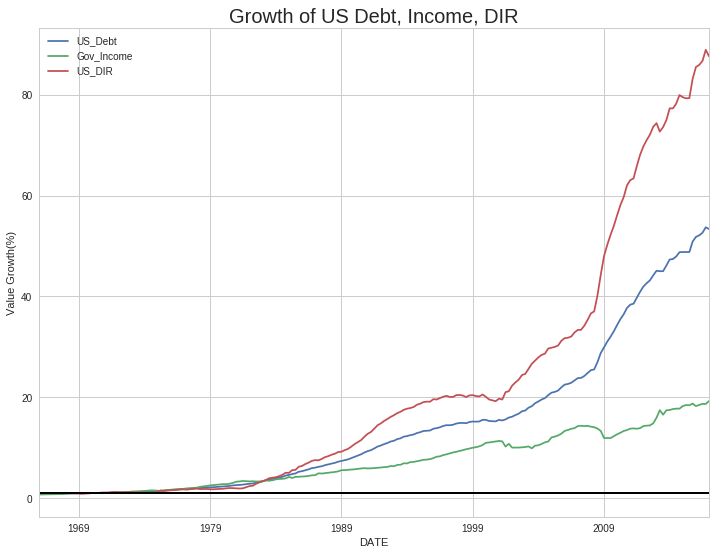

In [19]:
second_debt_growth_plot = second_debt_growth.plot(grid=True)

second_debt_growth_plot.axhline(y = 1, color = 'black', lw = 2)

second_debt_growth_plot.set_title('Growth of US Debt, Income, DIR',fontsize=20)

second_debt_growth_plot.set_ylabel('Value Growth(%)')

Debt and DIR growth both over took income growth around 1985.

The negative growth of the US current accounts dwarfs the growth of DIR and GDP.

What can we expect US debt to look like in the future? We can make a forecast by using all aggregated debt data from the last 50 years, then use the Monte Carlo method to make a probability distribution whose mean can give a reasonable expectation of what US debt may look like.

In [186]:
debt_df = data.DataReader(['GFDEBTN'],'fred',start,end)

debt_df.columns = ['US_Debt']

US_debt_growth = debt_df.pct_change()

debts = US_debt_growth.dropna()

In [187]:
#Use Monte Carlo method to run many trial

#Set time horizon (40 quarters, or 10 years)
quarters = 40

#Delta

dt = 1/quarters

#Now grab our mu (dist) 

mu = debts.mean()['US_Debt']

#Now grab the volatilility 
sigma = debts.std()['US_Debt']

In [188]:
#Create a function that takes in the starting value and the number of quarters
#and uses the sigma and mu from our dataframe

def debt_monte_carlo(start_value,quarters,mu,sigma):
    #""" This function takes in a starting debt value, number of periods per simulation, mu and sigma and returns a simulation valu earray """

    #Define a value array with the same number of periods as you want to study

    debt_value = np.zeros(quarters)
    debt_value[0] = start_value
    
    #Shock and drift
    shock = np.zeros(quarters)
    drift = np.zeros(quarters)
    
    #Run value array for number of days
    for x in range(1,quarters):
            
            #Caluculate shock, drift, value
            shock[x] = np.random.normal(loc=mu * dt,scale=sigma * np.sqrt(dt))
            drift [x] = mu * dt
            debt_value[x] = debt_value[x-1] + (debt_value[x-1] * (drift[x] + shock[x]))
            
    return debt_value

In [189]:
#Put the function to work

#Get start value from debt_df.tail()

In [190]:
debt_df.tail(1)

,US_Debt
DATE,
2017-01-01,19846420


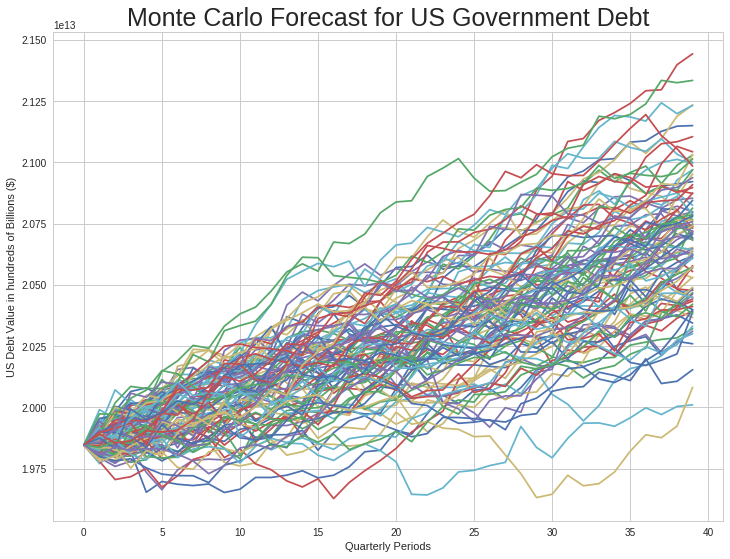

In [191]:
start_value = 19846420000000

for run in range(100):
    plt.plot(debt_monte_carlo(start_value,quarters,mu,sigma))
    
plt.xlabel('Quarterly Periods')
plt.ylabel('US Debt Value in hundreds of Billions ($)')
plt.title('Monte Carlo Forecast for US Government Debt',fontsize=25)

All the Markov chains in the Monte Carlo trend upwards. None of the Markov chains resulted in a value below the initial 19.8 trillion.

In [192]:
#Make a histogram of the end results 

#Set a large number of runs
runs= 10000

#Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

#Set the print options of numpy to only displace 0-5 points from an array to supress output
np.set_printoptions(threshold=5)

for run in range(runs):
    
    #Set the simulation data point as the last stock price for that run
    #This is basically creting an array of all the last stock prices for all 10000 runs
    
    simulations[run] = debt_monte_carlo(start_value,quarters,mu,sigma)[quarters-1];

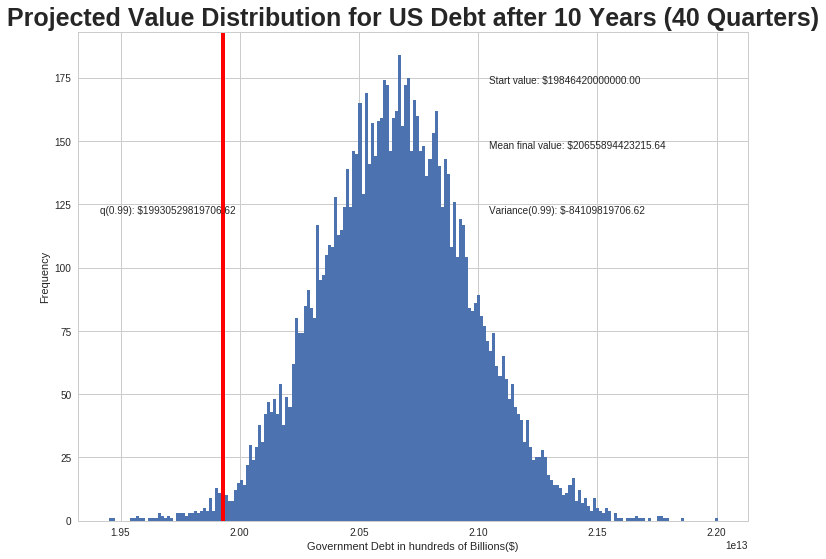

In [193]:
#Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between her
q = np.percentile(simulations,1)

#Plot the distribution of the end prices
plt.hist(simulations,bins=200)

#Using plt.figtext to fill in some additional information onto the plot

#Starting price
plt.figtext(0.6,0.8, s = 'Start value: $%.2f' % start_value)

#Mean ending price
plt.figtext(0.6,0.7, 'Mean final value: $%.2f' % simulations.mean())

#Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6,'Variance(0.99): $%.2f' % (start_value - q),)

#Display 1% quatile
plt.figtext(0.15,0.6,'q(0.99): $%.2f' % q)

#Plot a line at the 1% quantile
plt.axvline(x=q,linewidth=4,color='r')

#Title
plt.title(u'Projected Value Distribution for US Debt after 10 Years (%s Quarters)' % quarters, weight='bold',fontsize=25)

plt.ylabel('Frequency')

plt.xlabel('Government Debt in hundreds of Billions($)')

The final mean value of the probability distribution for US debt after 10 years is 20.7 trillion US dollars.

Conclusions

The debt forecast indicates that the US government debt will almost certainly increase. What is interesting about the result is how conservative it is. The average value in the final Monte Carlo probability distribution is less than a 1 trillion dollar increase of the debt in ten years time.

This conservatism may be due to the weight of slower debt growth data in the 60’s and 70’s. However, US debt dropped by a $100 billion in the last quarter of 2016. This may also be affecting the model.

As wild as CA growth was, it did not seem to affect debt or GDP growth. When debt rapidly increased in the face of the 2008 financial crisis, the current account moved away from importing. Government stimulus spending may have simultaneously increased government debt while creating enough domestic surplus that firms decided to start exporting.

The US Debt to Income ratio has ballooned from $189 billion in 1966 to $16.3 trillion in 2016. US government income was $3.6 trillion in 2017, while US government debt was $19.8 trillion. Is this financial situation acceptable? Considering that US federal energy assets are worth about $128 trillion, it seems the US government is operating well within its means.